In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mostafamohamedkamal","key":"ee4b48fd4226302b4ed69abc579628e7"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

100% 1.37G/1.37G [00:06<00:00, 220MB/s]
100% 1.37G/1.37G [00:06<00:00, 226MB/s]


In [ ]:
!unzip tomato-disease-multiple-sources.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import tensorflow as tf
import keras
import cv2

In [ ]:
trainpath = '/content/Train/' 
testpath = '/content/Test/'

In [ ]:
from pathlib import Path
import imghdr

train_dir = "/content/Train"
image_extensions = [".png", ".jpg" , ".JPG"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(train_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)

        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

test_dir = "/content/Test"
image_extensions = [".png", ".jpg" , ".JPG"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(test_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)

        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)            

/content/Train/healthy/branch-tomato-leaves-iaolsted-on-260nw-1025727106.jpg is not an image
/content/Train/healthy/edible-tomato-leaves.jpg is a webp, not accepted by TensorFlow
/content/Train/healthy/tomato-leaf-isolated-on-white-260nw-580281301.jpg is not an image
/content/Test/healthy/2013-08-20-05.jpg is a webp, not accepted by TensorFlow
/content/Test/healthy/tomato-leaves-isolated-on-white-260nw-1313938871.jpg is not an image
/content/Test/healthy/tomato-leaves-isolated-on-white-260nw-1251320371.jpg is not an image
/content/Test/healthy/tomato-leaf-isolated-on-white-260nw-1167806389.jpg is not an image


In [ ]:
for folder in  os.listdir(trainpath) : 
    trainfiles1 = gb.glob(pathname= str( trainpath + folder + '/*.JPG'))
    trainfiles2 = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    trainfiles3 = gb.glob(pathname= str( trainpath + folder + '/*.png'))
    trainfiles= trainfiles1 + trainfiles2 + trainfiles3  
    print(f'For training data , found {len(trainfiles)} in folder {folder}')
for folder in  os.listdir(testpath) : 
    testfiles1 = gb.glob(pathname= str( testpath + folder + '/*.JPG'))
    testfiles2 = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    testfiles3 = gb.glob(pathname= str( testpath + folder + '/*.png'))
    testfiles= testfiles1 + testfiles2 + testfiles3  
    print(f'For testing data , found {len(testfiles)} in folder {folder}')    

For training data , found 3048 in folder healthy
For training data , found 1827 in folder target_spot
For training data , found 0 in folder .ipynb_checkpoints
For training data , found 2826 in folder bacterial_spot
For testing data , found 802 in folder healthy
For testing data , found 457 in folder target_spot
For testing data , found 0 in folder .ipynb_checkpoints
For testing data , found 732 in folder bacterial_spot


In [ ]:
labels = {'bacterial_spot': 0, 'healthy': 1, 'target_spot': 2}

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    trainfiles1 = gb.glob(pathname= str( trainpath + folder + '/*.JPG'))
    trainfiles2 = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    trainfiles3 = gb.glob(pathname= str( trainpath + folder + '/*.png'))  
    trainfiles= trainfiles1 + trainfiles2 + trainfiles3
    for file in trainfiles: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (224,224))
        X_train.append(list(image_array))
        y_train.append(labels[folder])

print(f'we have {len(X_train)} items in X_train')   

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    testfiles1 = gb.glob(pathname= str( testpath + folder + '/*.JPG'))
    testfiles2 = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    testfiles3 = gb.glob(pathname= str( testpath + folder + '/*.png'))
    testfiles= testfiles1 + testfiles2 + testfiles3 
    for file in testfiles: 
        image = cv2.imread(file)
        try:
          image_array = cv2.resize(image , (224,224))
        except Exception as e:
          print(str(e))
              
        X_test.append(list(image_array))
        y_test.append(labels[folder])

print(f'we have {len(X_test)} items in X_test')  

we have 7701 items in X_train
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

we have 1991 items in X_test


In [ ]:
from keras.utils import to_categorical


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255



print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7701, 224, 224, 3)
X_test shape  is (1991, 224, 224, 3)
y_train shape  is (7701,)
y_test shape  is (1991,)


In [ ]:
from sklearn.utils import shuffle

X_train , y_train = shuffle(X_train,y_train)
X_test , y_test = shuffle(X_test,y_test)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(f'y_train shape  is {y_train_one_hot}')
print(f'y_test shape  is {y_test_one_hot}')

y_train shape  is [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
y_test shape  is [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
img_input = Input(shape = (224,224,3), name='img_input')

x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_input)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Conv2D(256, (3,3) , padding = 'same' , activation='relu', name = 'layer_8') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_9') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'layer_10')(x)
x = Dropout(0.5) (x)
x = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs = img_input , outputs =x , name='tomato' )
model.summary()

Model: "tomato"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout_23 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)        0    

In [ ]:
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
97/97 [==============================] - 2142s 22s/step - loss: 1.0648 - accuracy: 0.5097 - val_loss: 0.8134 - val_accuracy: 0.5445
Epoch 2/5
97/97 [==============================] - 2162s 22s/step - loss: 0.4808 - accuracy: 0.8076 - val_loss: 0.4615 - val_accuracy: 0.8040
Epoch 3/5
97/97 [==============================] - 2147s 22s/step - loss: 0.2856 - accuracy: 0.9026 - val_loss: 0.3507 - val_accuracy: 0.8611
Epoch 4/5
97/97 [==============================] - 2141s 22s/step - loss: 0.2069 - accuracy: 0.9339 - val_loss: 0.2395 - val_accuracy: 0.9059
Epoch 5/5
97/97 [==============================] - 2143s 22s/step - loss: 0.2082 - accuracy: 0.9317 - val_loss: 0.2078 - val_accuracy: 0.9247


In [ ]:
model.save('/content/model')

In [ ]:
!zip -r /content/file.zip /content/model

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

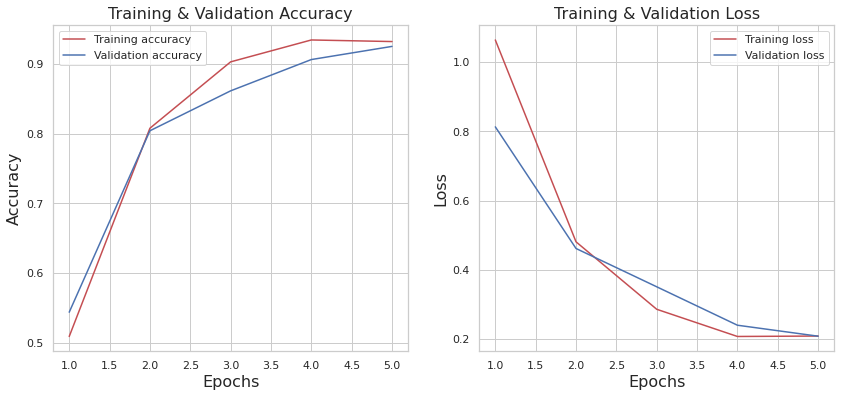

In [ ]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)


63/63 [==============================] - 162s 3s/step - loss: 0.1993 - accuracy: 0.9382
Test loss 0.19933034479618073
Test accuracy 0.9382219910621643


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.argmax(y_pred , axis= 1)

print(y_pred)
print(y_test)

63/63 [==============================] - 161s 3s/step
[[5.1874068e-04 9.2163116e-01 7.7850044e-02]
 [1.7456208e-04 9.8968762e-01 1.0137765e-02]
 [9.9968064e-01 1.8426313e-04 1.3511689e-04]
 ...
 [6.7103028e-01 3.2844907e-01 5.2068778e-04]
 [1.8839840e-02 6.0926959e-02 9.2023313e-01]
 [4.0267859e-02 9.5342869e-01 6.3034915e-03]]
[1 1 0 ... 0 2 1]
[1 1 0 ... 1 2 1]


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[724   7   1]
 [ 74 700  28]
 [ 10   3 444]]


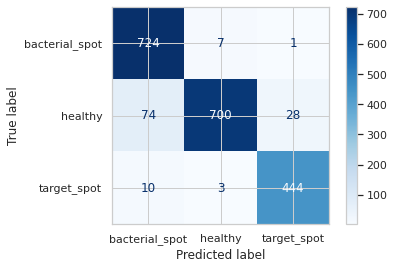

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= conf_mat, display_labels=["bacterial_spot", "healthy", "target_spot"])
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
!zip -r /content/myModel.zip /content/saved_model/my_model

  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 68%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 90%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 93%)


In [ ]:
files.download("/content/myModel.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>